<a href="https://colab.research.google.com/github/marevalojaimes/Arevalo_DSPN_S25/blob/main/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 9: Classification

1. Loading and formatting the data 1/1
2. Visualizing the data 1/1
3. Logisic Regression: Fitting the model 2/2
4. Interpreting predictions from the model 3/3: Great job spotting the false negative!
5. QDA 3/3

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?).

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data.

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [ ]:
library(readr)
library(dplyr)
library(tidyr)
lexical_inc_data <- read_csv("https://raw.githubusercontent.com/marevalojaimes/Data_ScienceCMU/refs/heads/master/Homework%20datasets/lexDat/LexicalData_withIncorrect.csv")
items_data <- read_csv ("https://raw.githubusercontent.com/marevalojaimes/Data_ScienceCMU/refs/heads/master/Homework%20datasets/lexDat/Items.csv")

items <- items_data %>%
  select (Word,Length,Log_Freq_HAL) %>%
  rename(D_Word = Word)

Lexical_merged <- lexical_inc_data %>%
  left_join(items, by = "D_Word") %>%
  drop_na()

head (Lexical_merged)








New names:
• `` -> `...1`
Rows: 74869 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): D_Word
dbl (6): ...1, Sub_ID, Trial, Type, D_Zscore, Correct
num (1): D_RT
lgl (1): Outlier

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 30959 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Word
dbl (3): Occurrences, Length, Log_Freq_HAL
num (1): Freq_HAL

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Length,Log_Freq_HAL
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,157,1,1,710,browse,FALSE,-0.437,1,6,8.856
2,67,1,1,1094,refrigerant,FALSE,0.825,1,11,4.644
3,120,1,1,587,gaining,FALSE,-0.645,1,7,8.304
4,21,1,1,984,cheerless,FALSE,0.025,1,9,2.639
5,236,1,1,577,pattered,FALSE,-0.763,1,8,1.386
6,236,2,1,715,conjures,FALSE,-0.364,1,8,5.268


---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



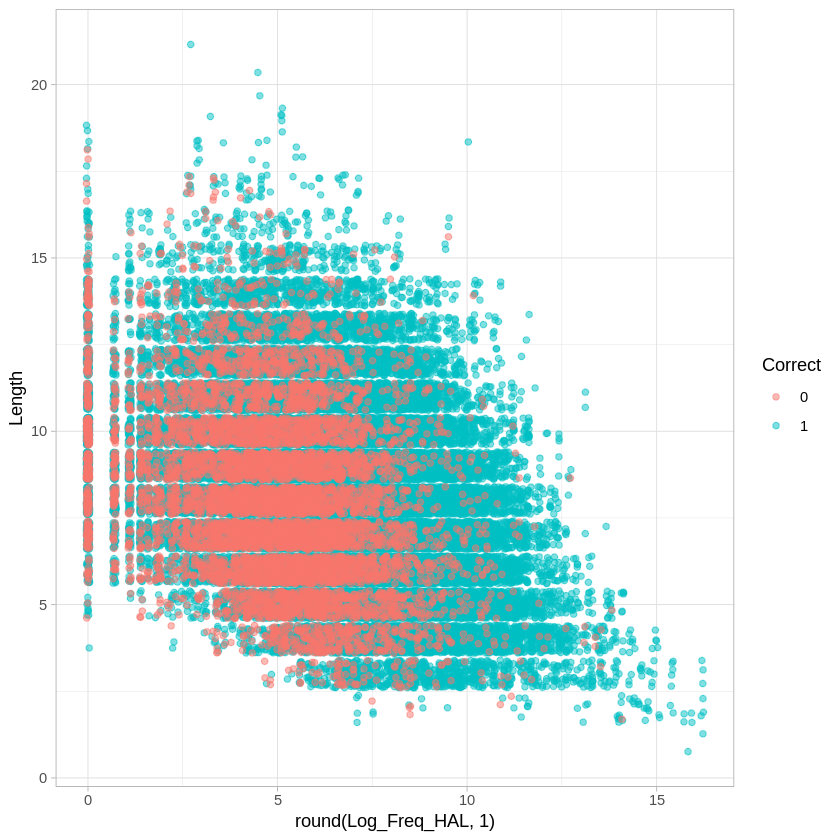

In [ ]:
install.packages("tidyverse")
library(tidyverse)
Lexical_Correct <- as.factor(Lexical_merged$Correct)
ggplot(Lexical_merged,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light()


What do you observe about the "Correct" and "Incorrect" clusters?

> It seems like incorrect words (0) are less frequent in this dataset than correct words (1) but the word lenght is about the same in both cases.
>

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [ ]:
log_model <- glm(Correct ~ Length * Log_Freq_HAL, data = Lexical_merged, family = binomial)
summary(log_model)



Call:
glm(formula = Correct ~ Length * Log_Freq_HAL, family = binomial, 
    data = Lexical_merged)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)
There are significant associations between our predictors and the outcome. One unit increase in length and Log_Freq_HAL leads to 0.15 and 0.39 increase in Correct, respectively. However, in the interaction this association is still significant but is negative. This means the effect of lenght is lessen by Log_Freq_HAL regarding the Correctness.

>
>

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [ ]:

lexical_prob_df <- data.frame(predicted_prob = predict(log_model, newdata = Lexical_merged, type = "response"))

threshold = 0.50

lexical_prob_df$predicted_binary<-ifelse(lexical_prob_df$predicted_prob>threshold, 1, 0)
confusion_df<- data.frame(predicted = lexical_prob_df$predicted_binary,
actual= Lexical_merged$Correct)

confusion_matrix <- table(confusion_df)
print(confusion_matrix)
accuracy <- mean(confusion_df$predicted == confusion_df$actual)
print(paste("Accuracy:", round(accuracy, 4)))










         actual
predicted     0     1
        0    13    44
        1  7966 62566
[1] "Accuracy: 0.8865"


Did the model do well at predicting lexical decision correctness? Why or why not?

> Yes, the model can predict with 88.65% accuracy but is better at anticipating correct (1)responses than incorrect (0) ones. Further analysis is needed due to the presence of false negatives.

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`.

*Hint: see the Classifiers tutorial.*

In [ ]:
library(MASS)
qda_m <- qda(Correct ~ Length * Log_Freq_HAL, data= Lexical_merged)
summary(qda_m)



        Length Class  Mode     
prior    2     -none- numeric  
counts   2     -none- numeric  
means    6     -none- numeric  
scaling 18     -none- numeric  
ldet     2     -none- numeric  
lev      2     -none- character
N        1     -none- numeric  
call     3     -none- call     
terms    3     terms  call     
xlevels  0     -none- list     

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy.

In [ ]:

qda_pre_df <- data.frame(predicted_prob = predict(qda_m, newdata = Lexical_merged, type = "response")$posterior [, 2])

threshold = 0.50

qda_pre_df$predicted_binary<-ifelse(qda_pre_df$predicted_prob>threshold, 1, 0)
confusion_qda<- data.frame(predicted = qda_pre_df$predicted_binary,
actual= Lexical_merged$Correct)

confusion_matrixq <- table(confusion_qda)
print(confusion_matrixq)

accuracyqda <- mean(confusion_qda$predicted == confusion_qda$actual)
print(paste("Accuracy:", round(accuracyqda, 4)))




         actual
predicted     0     1
        0   455  1647
        1  7524 60963
[1] "Accuracy: 0.8701"


How does QDA prediction performance differ from that of logistic regression?


*   Logistic has higher accuracy (88.67%) than QDA (87.01%) but this is a small difference.
*   QDA performed better at predicting incorrect words (0) compared to Logistic regression.
*   Both models predict correct words in a similar way and have high number of false negatives.




>

**DUE:** 5pm EST, March 11, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> I used ChatGPT to troubleshoot my code when I encountered errors.